<a href="https://colab.research.google.com/github/RohanMacherla/Deep_Learning/blob/main/dl_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/datasets/2_CarPricesData.pkl')
df

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750
...,...,...,...,...,...,...,...,...
1431,69.0,20544,1025.0,86,1,1300.0,3,7500
1432,72.0,19000,1015.0,86,0,1300.0,3,10845
1433,71.0,17016,1015.0,86,0,1300.0,3,8500
1434,70.0,16916,1015.0,86,1,1300.0,3,7250


In [ ]:
#Handling the data
df.isnull().sum()

,0
Age,0
KM,0
Weight,0
HP,0
MetColor,0
CC,0
Doors,0
Price,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df[['Age','KM','Weight', 'HP','CC']]=sc.fit_transform(df[['Age','KM','Weight','HP','CC']])
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,0.278481,0.193355,0.515625,0.170732,1,1.0,3,13500
1,0.278481,0.300149,0.515625,0.170732,1,1.0,3,13750
2,0.291139,0.171647,0.515625,0.170732,1,1.0,3,13950
3,0.316456,0.197528,0.515625,0.170732,0,1.0,3,14950
4,0.367089,0.158433,0.531250,0.170732,0,1.0,3,13750


In [ ]:
#Handling outliers
#spitting data
X = df.drop('Price',axis=1)
y = df['Price']

In [ ]:
X.shape

(1435, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1076, 7)
(359, 7)


In [ ]:
#Model Building
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=25, input_dim = 7,kernel_initializer = 'random_uniform', activation='relu'))
model.add(Dense(units=32, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=64, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='he_uniform'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,209 (12.54 KB)

 Trainable params: 3,209 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
model.fit(X_train,y_train,batch_size=10,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 68786320.0000 - mse: 68786320.0000 - val_loss: 46168192.0000 - val_mse: 46168192.0000
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 52806140.0000 - mse: 52806140.0000 - val_loss: 22478250.0000 - val_mse: 22478250.0000
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 20497778.0000 - mse: 20497778.0000 - val_loss: 6997386.5000 - val_mse: 6997386.5000
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6918510.0000 - mse: 6918510.0000 - val_loss: 6348959.0000 - val_mse: 6348959.0000
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6019107.5000 - mse: 6019107.5000 - val_loss: 5852736.0000 - val_mse: 5852736.0000
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5274355.5000 - mse: 5274355.5000 - val_loss: 6017254.0000 - val_mse: 6017254.0000
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5266265.0000 - mse: 5266265.0000 - val_loss: 5829922.5000 - val_mse: 5829922.5000
Epoch 8/50

<Axes: ylabel='Age'>

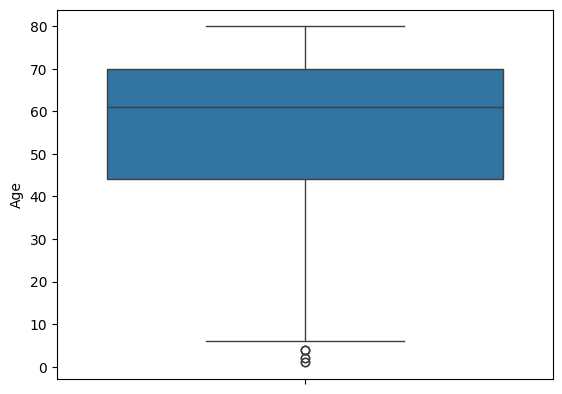

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df['Age'])

<Axes: ylabel='KM'>

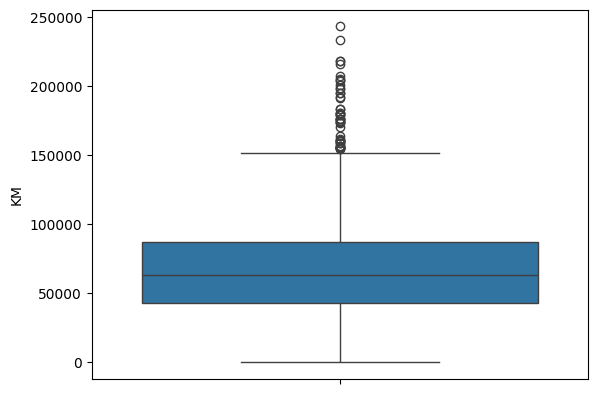

In [ ]:
sns.boxplot(df['KM'])

<Axes: ylabel='Weight'>

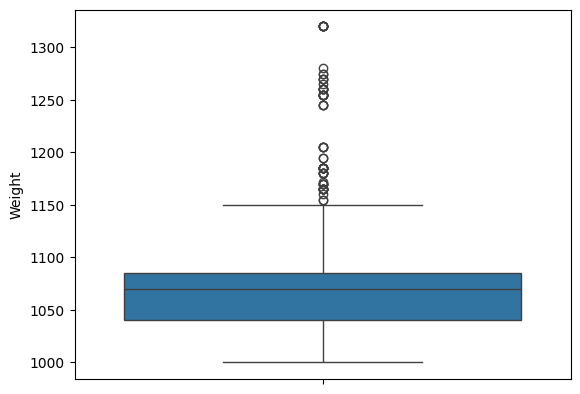

In [ ]:
sns.boxplot(df['Weight'])

<Axes: ylabel='HP'>

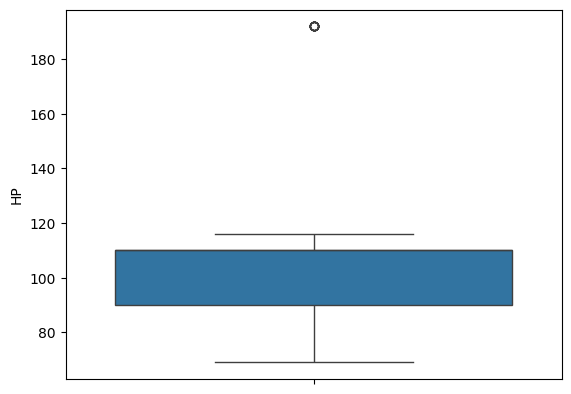

In [ ]:
sns.boxplot(df['HP'])

<Axes: ylabel='CC'>

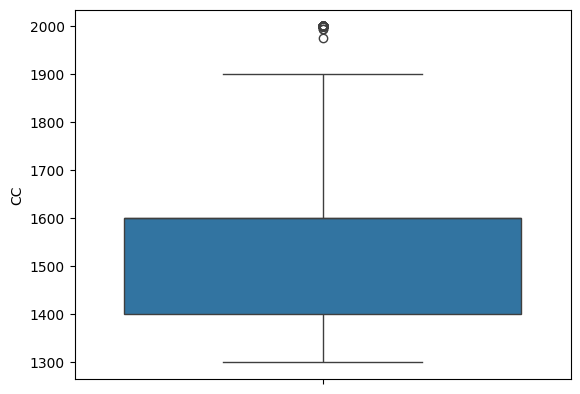

In [ ]:
sns.boxplot(df['CC'])

<Axes: ylabel='Price'>

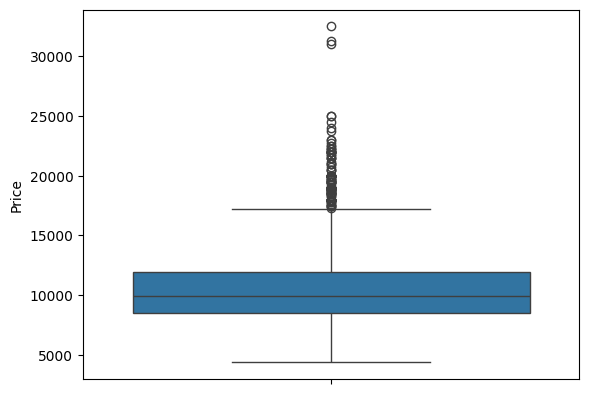

In [ ]:
sns.boxplot(df['Price'])

In [ ]:
# Calculate the first and third quartiles for 'Price'
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame with outliers removed
df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])
model.fit(X_train,y_train,batch_size=10,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4318374.5000 - mse: 4318374.5000 - val_loss: 4605713.0000 - val_mse: 4605713.0000
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3272988.7500 - mse: 3272988.7500 - val_loss: 4242500.0000 - val_mse: 4242500.0000
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3515257.7500 - mse: 3515258.0000 - val_loss: 5925937.0000 - val_mse: 5925937.0000
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3687950.7500 - mse: 3687950.7500 - val_loss: 4902371.5000 - val_mse: 4902371.5000
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3635095.7500 - mse: 3635096.2500 - val_loss: 4475049.5000 - val_mse: 4475049.5000
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2984529.2500 - mse: 2984529.2500 - val_loss: 4108144.2500 - val_mse: 4108144.2500
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3401540.5000 - mse: 3401540.5000 - val_loss: 4120434.2500 - val_mse: 4120434.2500
Epoch 8/50
86/86 ━━━